## Приоритизация гипотез и анализ A/B-теста для крупного интернет магазина

**Описание проекта**

   Для крупного интернет-магазина вместе с отделом маркетинга был подготовлен список гипотез для увеличения выручки.

В ходе проекта:
- были приоритизированы 9 гипотез для увеличения выручки.
- запущен A/B-тест
- проанализированы результаты A/B-теста

**Цель проекта:** Приоритизировать гипотезы, запустить A/B-тест и принять решение по результатам теста.


**План проекта:**
1. Приоритизация гипотез
- Загрузка данных и подготовка их к приоритизации гипотез 
- Приоритизация гипотез методами ICE и RICE
2. Анализ результатов A/B-теста из файлов orders и visitors:
- Загрузка данных и подготовка их к анализу результатов A/B-теста
- График кумулятивной выручки по группам.
- График кумулятивного среднего чека по группам.
- График относительного изменения кумулятивного среднего чека группы B к группе A. 
- График кумулятивной конверсии по группам. 
- График относительного изменения кумулятивной конверсии группы B к группе A. С
- Точечный график количества заказов по пользователям. 
- 95-й и 99-й перцентили количества заказов на пользователя. Граница для определения аномальных пользователей.
- Точечный график стоимостей заказов. 
- 95-й и 99-й перцентили стоимости заказов. Граница для определения аномальных заказов.
- Статистическая значимость различий в конверсии между группами по «сырым» данным. 
- Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным. 
- Статистическая значимость различий в конверсии между группами по «очищенным» данным. 
- Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным. 
- Выводы и предположения по всем графикам.
3. Выводы и решения по результатам теста

# 1. Приоритизация гипотез


<div class="alert alert-info">Загрузка данных и подготовка их к анализу</div>

In [1]:
import pandas as pd

df = pd.read_csv('hypothesis.csv')

df.columns = df.columns.str.lower() #приведение имен столбцов к единому виду
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


**Промежуточный вывод:** 
- формат всех столбцов верный
- пропусков нет
- названия столбцов привели к общему виду

<div class="alert alert-info">Приоритизация гипотез <b>способом ICE</b></div>

In [2]:
df['ICE'] = (df['impact'] * df['confidence']) / df['efforts']

pd.set_option('display.max_colwidth', 0)
display(round(df[['hypothesis','ICE']].sort_values(by='ICE', ascending=False),2))

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


**Промежуточный вывод по приоритизации гипотез способом ICE:** 
- Самая приоритетной оказалась гипотиза номер 8. 
- Чуть менее приоритетными гипотизы 0 и 7.

<div class="alert alert-info">Приоритизация гипотез <b>способом RICE</b></div>

In [3]:
df['RICE'] = (df['reach'] * df['impact'] * df['confidence']) / df['efforts']

display(df[['hypothesis','RICE']].sort_values(by='RICE', ascending=False))

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


**Промежуточный вывод по приоритизации гипотез способом RICE:** 
- Самая приоритетной оказалась гипотиза номер 7. (при приоритизации способом ICE - она была 3ей в списке)
- Чуть менее приоритетными гипотизы 2 и 0.

<div class="alert alert-info">Выведем результаты сразу двух фреймворков на одной таблице</div>

In [4]:
display(round(df[['hypothesis','ICE','RICE']].sort_values(by='RICE', ascending=False),2))

,hypothesis,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00,3.0


**Вывод по приоритезации гипотез:**
- Самыми приоритетными гипотизами выявлеными способом ICE оказались гипотизы № 8, 0 и 7.
- Самыми приоритетными гипотизами выявлеными способом RICE оказались гипотизы № 7, 2 и 0.
- В методе RICE(в отличии от метода ICE) учитывается параметр reach(количество пользователей которых затронет изменение), который у гипотез 7 и 2 очень высокий, а у гипотезы 8 очень низкий, что обьясняет отличия в приоритезации у этих методов.

# 2. Анализ A/B-теста

<div class="alert alert-info">Загрузка данных и подготовка их к анализу</div>

In [5]:
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

visitors = pd.read_csv('visitors.csv')
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

orders = pd.read_csv('orders.csv')
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

orders.columns = ['orderId','userId','date','revenue','group'] 

print('Таблица orders')
display(orders.head(5))
orders.info()
print('Количество полных дубликатов:')
print(orders.duplicated().sum())
print(60*'=-')

print('Таблица visitors')
display(visitors.head(5))
visitors.info()
print('Количество полных дубликатов:')
print(visitors.duplicated().sum())

Таблица orders


,orderId,userId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   orderId  1197 non-null   int64         
 1   userId   1197 non-null   int64         
 2   date     1197 non-null   datetime64[ns]
 3   revenue  1197 non-null   int64         
 4   group    1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB
Количество полных дубликатов:
0
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Таблица visitors


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB
Количество полных дубликатов:
0


**Промежуточный вывод:** 
- формат столбцов c датой привели к верному формату
- пропусков нет
- названия столбцов соответствуют общему виду
- полных дубликатов нет

<div class="alert alert-info">Распределение данных по группам А и Б</div>

In [6]:
a = orders.groupby('group').agg({'orderId' : 'count', 'userId' : 'nunique', 'revenue' : 'sum'}).reset_index()
a.columns = ['group', 'order_count', 'userId_nunique', 'revenue_sum']
display(a)
print(f'Количество уникальных пользователей в тесте : {orders.userId.nunique()}')
print(f'Количество уникальных пользователей в тесте при делении на группы : {a.userId_nunique.sum()}')

c = list(set(orders.query('group == "A"')['userId']) & set(orders.query('group == "B"')['userId']))
print(f'Количество пересечений уникальных пользователей в группах А и Б {len(c)}')

,group,order_count,userId_nunique,revenue_sum
0,A,557,503,4084803
1,B,640,586,5907760


Количество уникальных пользователей в тесте : 1031
Количество уникальных пользователей в тесте при делении на группы : 1089
Количество пересечений уникальных пользователей в группах А и Б 58


**Промежуточный вывод:** 

- Группы распределены не совсем равномерно по количеству уникальных пользователей
- Есть 58 пересечений уникальных пользователей между группами А и Б. Это небольшое количество от общего числа пользователей. 
- Удалить мы их не можем, так как не сможем их идентифицировать в таблице visitors. Поэтому оставляем. 

<div class="alert alert-info">Объявляем переменную <b>cumulativeData</b> которая будет содержать <b>агрегированные кумулятивные по дням данные о заказах и посетителях</b></div>

In [7]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates() 

# # получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'],orders['group'] == x['group'])].agg(
        {'date' : 'max',
         'group' : 'max',
         'orderId' : 'nunique',
         'userId' : 'nunique',
         'revenue' : 'sum'}
    ),axis=1).sort_values(
    by=['date','group']
) 

# получаем агрегированные кумулятивные по дням данные о посетителях
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[np.logical_and(
        visitors['date'] <= x['date'],
        visitors['group'] == x['group']
    )].agg(
        {'date' : 'max',
         'group' : 'max',
         'visitors' : 'sum'}
    ), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5)) 

        date group  orders  buyers  revenue  visitors
0 2019-08-01  A     24      20      148579   719     
1 2019-08-01  B     21      20      101217   713     
2 2019-08-02  A     44      38      242401   1338    
3 2019-08-02  B     45      43      266748   1294    
4 2019-08-03  A     68      62      354874   1845    


<div class="alert alert-info"><b>График кумулятивной выручки</b> по дням и группам A/B-тестирования</div>

''

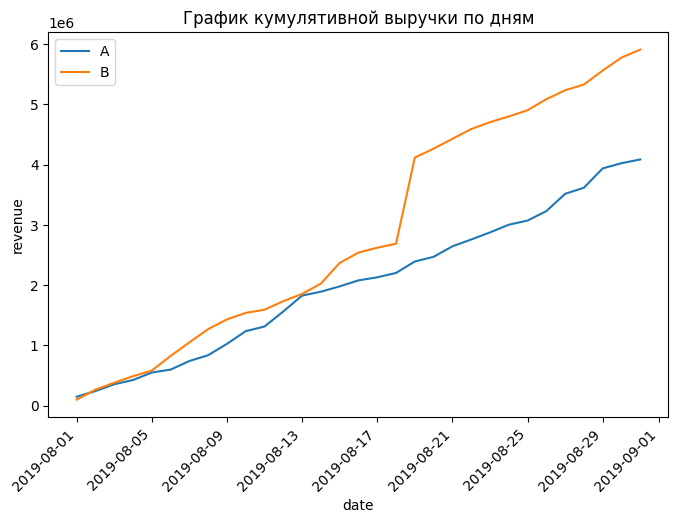

In [8]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(8, 5))

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.title('График кумулятивной выручки по дням')
plt.xlabel('date')
plt.ylabel('revenue')
plt.xticks(rotation=45, horizontalalignment='right')
plt.legend() 

;

**Промежуточный вывод:**
- До середины месяца выручка у двух групп растет практически равномерно.
- В середине месяца в группе B график резко растет. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке. 
- Далее графии так же показывают одинаковый плавный рост.

<div class="alert alert-info"><b>График кумулятивного среднего чека</b> по дням и группам A/B-тестирования</div>

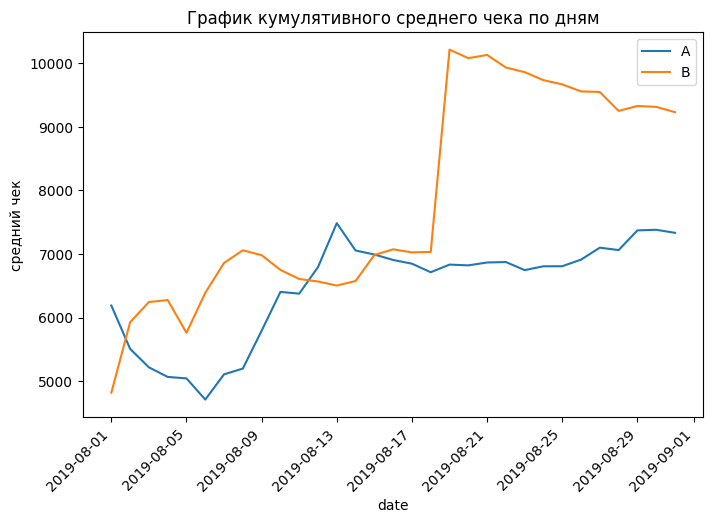

In [9]:
plt.figure(figsize=(8, 5))

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.title('График кумулятивного среднего чека по дням')
plt.xlabel('date')
plt.ylabel('средний чек')
plt.xticks(rotation=45, horizontalalignment='right')
plt.legend();

**Промежуточный вывод:**
- до середины месяца графики неравномерны из-за недостатка данных, но находятся в пределах 7,5тыс. 
- в середине месяца в группу B видимо попали крупные заказы(возможно 1 очень крупный заказ) - резкий всплеск на графике. Теперь группе В нужно больше данных, чтобы прийти к реальному среднему чеку и установиться на его уровне.

<div class="alert alert-info"><b>График относительного изменения кумулятивного среднего чека </b> группы B к группе A.</div>

''

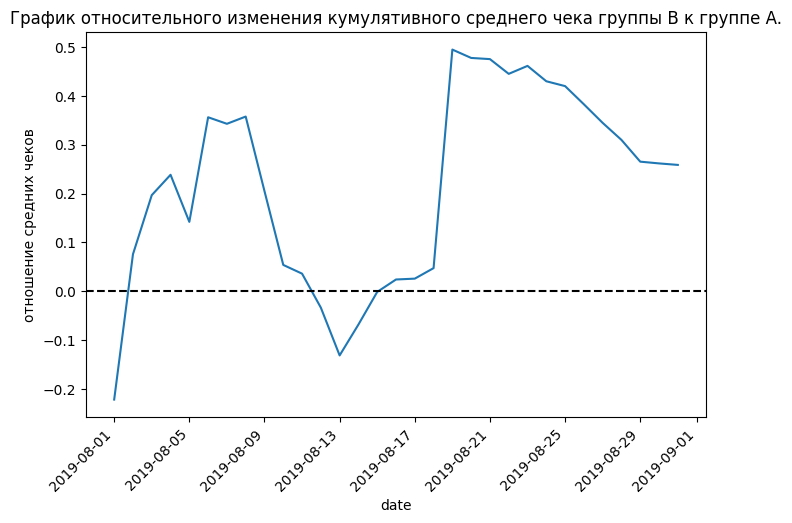

In [10]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(8, 5))

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 

plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A.')
plt.xlabel('date')
plt.ylabel('отношение средних чеков')
plt.xticks(rotation=45, horizontalalignment='right')

;

**Промежуточный вывод:**
- видим резкий скачок в сердине месяца, как и на предыдущих графиках. Группа В явно выигрывает группу А, но вероятнее всего это произошло из-за выбросов(крупных заказов в середине месяца).

<div class="alert alert-info"><b>График кумулятивной конверсии</b> по группам</div>

''

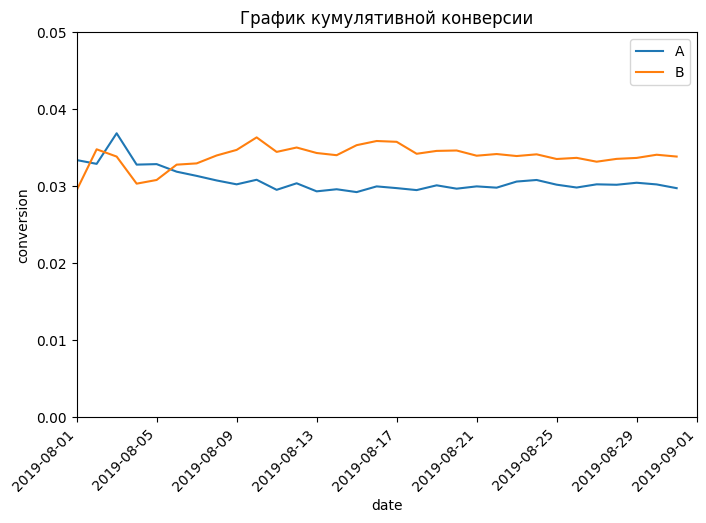

In [11]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.figure(figsize=(8, 5))

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')

plt.title('График кумулятивной конверсии')
plt.xlabel('date')
plt.ylabel('conversion')
plt.xticks(rotation=45, horizontalalignment='right')
plt.legend()

plt.legend()

# задаем масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), 0, 0.05]) 

;

**Промежуточный вывод:**
- график кумулятивной конверсии стабилизировался к середине месяца и показывает, что пользователи группы В конвертируются в покупателей стабильно чаще. 

<div class="alert alert-info"><b>График относительного изменения кумулятивной конверсии</b> группы B к группе A.</div>

''

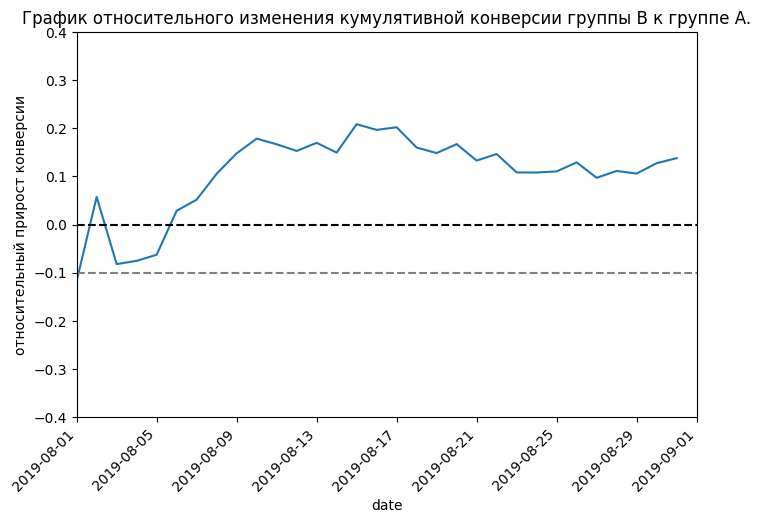

In [12]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(8, 5))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), -0.4, 0.4]) 

plt.title('График относительного изменения кумулятивной конверсии группы B к группе A.')
plt.xlabel('date')
plt.ylabel('относительный прирост конверсии')
plt.xticks(rotation=45, horizontalalignment='right')
;

**Промежуточный вывод:**
- уже после первой недели группа B явно лидирует по отношению к группе А. График еще не стабилизировался, но определенно точно группа B конвертируется в покупателей лучше. 

*возможно, после анализы аномалий, картина изменится.

<div class="alert alert-info"><b>Точечный график количества заказов по пользователям.</b></div>

          userId  orders
1023  4256040402  11    
591   2458001652  11    
569   2378935119  9     
487   2038680547  8     
44    199603092   5     
744   3062433592  5     
55    237748145   5     
917   3803269165  5     
299   1230306981  5     
897   3717692402  5     


''

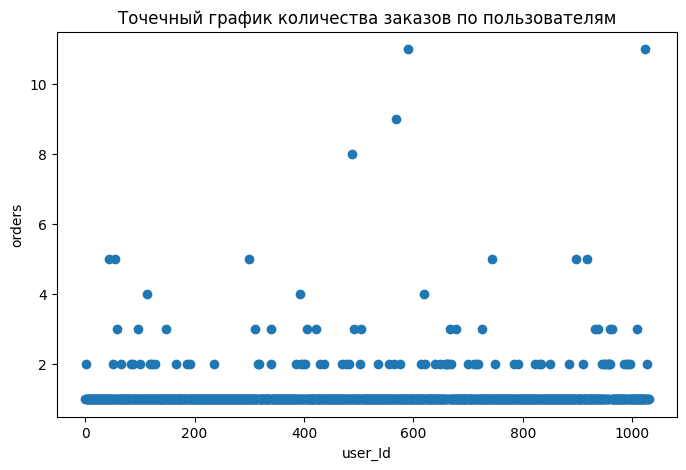

In [13]:
ordersByUsers = (
    orders.groupby('userId', as_index=False)
    .agg({'orderId': 'nunique'})
)

ordersByUsers.columns = ['userId', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10)) 

plt.figure(figsize=(8, 5))
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders']) 
plt.title('Точечный график количества заказов по пользователям')
plt.xlabel('user_Id')
plt.ylabel('orders')

;

**Промежуточный вывод:**
- по графику видим, что чаще всего покупатели делают до 2ух заказов. Хотя и в таблице и на графике видим цифры до 11ти.
- посмотрим 95-й и 99-й перцентили


<div class="alert alert-info"><b>95-й и 99-й перцентили количества заказов на пользователя.</b></div>

In [14]:
print(np.percentile(ordersByUsers['orders'], [90, 95, 99])) 

[1. 2. 4.]


**Промежуточный вывод:**
- всего 5% покупателей делают более 2ух заказов
- и всего 1 % больше 4ех закатов
- будем считать всех кто делает более 2ух заказов - аномалиями

<div class="alert alert-info"><b>Точечный график стоимостей заказов.</b></div>

''

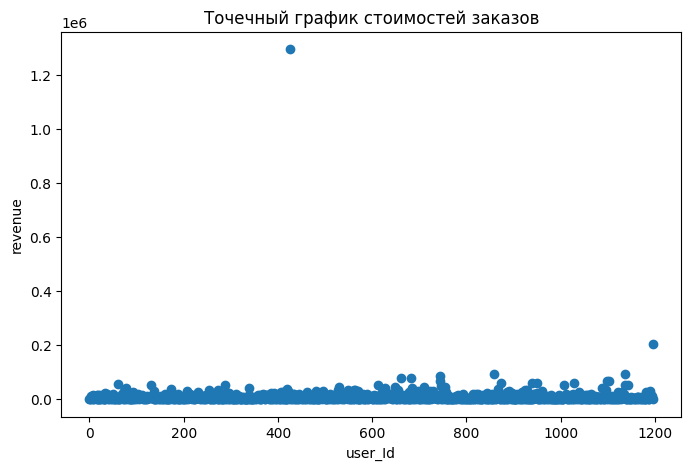

In [15]:
plt.figure(figsize=(8, 5))
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 
plt.title('Точечный график стоимостей заказов')
plt.xlabel('user_Id')
plt.ylabel('revenue')

;

**Промежуточный вывод:**
- Из-за двух выбросов график стал неинформативным. Давай сделаем еще один график без выбросов.

<div class="alert alert-info"><b>Точечный график стоимостей заказов с лимитом в 60тыс.</b></div>

''

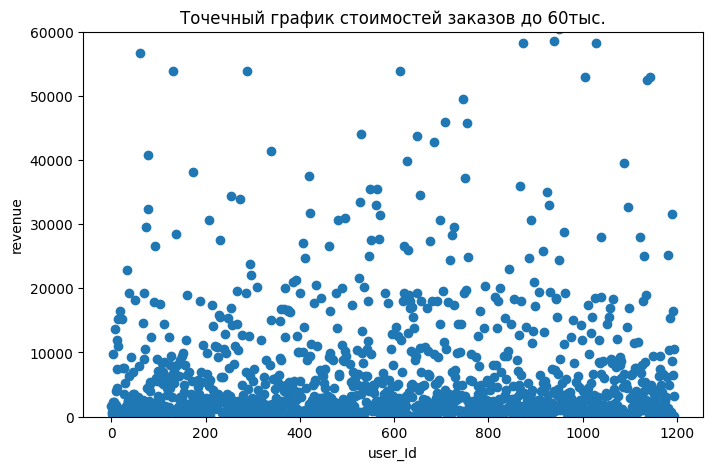

In [16]:
plt.figure(figsize=(8, 5))
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 
plt.ylim(0,60000)
plt.title('Точечный график стоимостей заказов до 60тыс.')
plt.xlabel('user_Id')
plt.ylabel('revenue')

;

**Промежуточный вывод:**
- выбросов много. Основная масса стоимостей заказов колеблеться до отметки 20.тыс
* проверим это 95-ым и 99-ым перцентилями

<div class="alert alert-info"><b>95-й и 99-й перцентили стоимости заказов на пользователя.</b></div>

In [17]:
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


**Промежуточный вывод:**
- всего 5% покупателей делают заказы на сумму более 28тыс
- и всего 1 % больше 58тыс
- будем считать всех кто делает заказы на сумму более 28тыс - аномалиями

<div class="alert alert-info">Объявление переменных <b>sampleA и sampleB</b> в которых пользователям из разных групп будет соответствовать количество заказов</div>

In [18]:
visitors

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [19]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('userId', as_index=False)
    .agg({'orderId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('userId', as_index=False)
    .agg({'orderId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 

sampleA = pd.concat([ordersByUsersA['orders'],
                     pd.Series(0, 
                               index=np.arange(visitors[visitors['group']=='A']['visitors'].sum() - 
                                               len(ordersByUsersA['orders'])), 
                               name='orders')],
                    axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],
                     pd.Series(0, 
                               index=np.arange(visitors[visitors['group']=='B']['visitors'].sum() - 
                                               len(ordersByUsersB['orders'])), 
                               name='orders')],
                    axis=0)


display(sampleA.unique()) #проверим какие варианты количества заказов есть в группе А
display(sampleB.unique()) #проверим какие варианты количества заказов есть в группе В

array([1, 4, 2, 3, 5, 7, 0], dtype=int64)

array([1, 3, 2, 5, 6, 4, 0], dtype=int64)

<div class="alert alert-info"><b>Статистическая значимость различий в конверсии</b> между группами по <b>«сырым»</b> данным.</div>

- **Гипотеза Н0** - Статистически значимых различий в конверсии заказов между группами А и Б НЕТ.

- **Гипотеза Н1** - Статистически значимое различие в конверсии заказов между группами А и Б ЕСТЬ.

- **alpha** устанавливаем на уровне 5%


- проверяем эту и следующие гипотезы методом **Манна-Уитни.**

In [20]:
print("{0:.3f} p-value".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print("{0:.3f} относительный прирост среднего числа заказов группы B".format(sampleB.mean() / sampleA.mean() - 1))

0.017 p-value
0.138 относительный прирост среднего числа заказов группы B


**Промежуточный вывод:**
- По «сырым» данным **различия в среднем числе заказов групп A и B - ЕСТЬ**.
- Первое число — p-value = 0.017 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии заказов между группами нет,  отвергаем. 
- Относительный выйгрыш группы B равен 13.8% — второе число в выводе.

<div class="alert alert-info"><b>Статистическая значимость различий в среднем чеке</b> между группами по <b>«сырым»</b> данным.</div>

- **Гипотеза Н0** - Статистически значимых различий в среднем чеке между группами А и Б НЕТ.

- **Гипотеза Н1** - Статистически значимое различие в среднем чеке между группами А и Б ЕСТЬ.

- **alpha** устанавливаем на уровне 5%

In [21]:
print('{0:.3f} p-value'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f} относительный прирост среднего чека группы B'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

0.729 p-value
0.259 относительный прирост среднего чека группы B


**Промежуточный вывод:**
- P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет.
- Средний чек группы B значительно выше среднего чека группы A. Но наблюдаемое превышение среднего чека группы В на 25,9% не является значимым, получено случайно.

<div class="alert alert-info">Узнаем, сколько всего аномальных пользователей</div>

Напомним, что аномальными пользователями мы считаем тех:
- кто делает больше 2ух заказов
- у кого стоимость заказа более 28тыс

In [22]:
abnormal_orders = 2
abnormal_revenue = 28000

usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > abnormal_orders]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > abnormal_orders]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > abnormal_revenue]['userId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(60*'=-')
print(f'Всего аномальных пользователей : {abnormalUsers.shape[0]}') 

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
Name: userId, dtype: int64
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Всего аномальных пользователей : 74


<div class="alert alert-info">Для расчета статистической значимости различий по очищенным данным - подготовим выборки количества заказов по пользователям по группам теста:</div>

In [23]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(visitors[visitors['group']=='A']['visitors'].sum() - 
                                               len(ordersByUsersA['orders'])), 
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(visitors[visitors['group']=='B']['visitors'].sum()- len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

<div class="alert alert-info"><b>Статистическая значимость различий в конверсии</b> между группами по <b>«очищенным»</b> данным.</div>

- **Гипотеза Н0** - Статистически значимых различий в конверсии между группами А и Б НЕТ.

- **Гипотеза Н1** - Статистически значимое различие в конверсии между группами А и Б ЕСТЬ.

- **alpha** устанавливаем на уровне 5%

In [24]:
print('{0:.3f} p-value'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f} относительный прирост в конверсии группы B'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

0.013 p-value
0.173 относительный прирост в конверсии группы B


**Промежуточный вывод:**
- По «очищенным» данным **различия в среднем числе заказов групп A и B - всё также ЕСТЬ**.
- Первое число — p-value = 0.013 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии заказов между группами нет,  отвергаем. 
- Относительный выйгрыш группы B равен 17.3% — выше, чем результат без очистки аномалий.

<div class="alert alert-info"><b>Статистическая значимость различий в среднем чеке</b> между группами по <b>«очищенным»</b> данным.</div>

- **Гипотеза Н0** - Статистически значимых различий в среднем чеке между группами А и Б НЕТ.

- **Гипотеза Н1** - Статистически значимое различие в среднем чеке между группами А и Б ЕСТЬ.

- **alpha** устанавливаем на уровне 5%

In [25]:
print(
    '{0:.3f} p-value'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['userId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['userId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f} относительный прирост среднего чека группы B".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['userId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['userId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

0.738 p-value
-0.020 относительный прирост среднего чека группы B


**Промежуточный вывод:**
- P-value 0.738, что значительно больше 0.05. Как и в тесте с аномалиями причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет.
- **Относительный выйгрыш группы B после очистки аномалий снизился до -2%. Хотя в тесте с "сырыми данными" был равен 25.9%!**

# Вывод

**Имеющиеся факты:**
1. ЕСТЬ статистически значимое различие по конверсии заказов между группами как по «сырым», так и по данным после фильтрации аномалий!
2. Статистически значимого различия по среднему чеку между группами НЕТ. Ни по «сырым», ни по данным после фильтрации аномалий;
Относительный выйгрыш группы B по среднему чеку после очистки аномалий снизился до -2%. Хотя в тесте с "сырыми данными" был равен 25.9%!
3. График различия конверсии между группами сообщает, что результаты группы B стабильно лучше группы A.
4. График различия среднего чека пока не очень стабилен, но уже можно сделать вывод, что если не брать в расчет выбросы - средние чеки групп А и B практически равны(В показывает -2% относительно группы А при анализе без аномалий, но с другой стороны возможно аномально большие покупки сделаны, как раз из-за внесения изменений)

**Выводы по тесту:**
- Исходя из обнаруженных фактов, тест следует признать успешным. **Группа В показала лучшие результаты, чем группа А.**
- Есть статистически зачимое различие в конверсии. 
- По среднему чеку статистически значимого различия нет, а относительное получено случайно, чтобы влиять на решение о продолжении теста. 
- Продолжать смысла нет, потому как вероятность, что при имеющихся данных сегмент А на самом деле лучше сегмента В — практически нулевая.